In [2]:
import json
import pandas as pd

file = "python_engineer.json"
data = None
with open(file, 'r') as f:
    data = json.load(f)
    
channel_id, stats = data.popitem()
print(channel_id)
channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]

UCbXgNpp0jedKWcQiULLbDTA


In [3]:
# channel statistics
print('views', channel_stats["viewCount"])
print('subscriber', channel_stats["subscriberCount"])
print('videos', channel_stats["videoCount"])

views 403299
subscriber 9980
videos 83


In [8]:
# video statistics
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]["title"]
    views = int(vid[1]["viewCount"])
    likes = int(vid[1]["likeCount"])
    dislikes = int(vid[1]["dislikeCount"])
    comments = int(vid[1]["commentCount"])
    stats.append([title, views, likes, dislikes, comments])

In [9]:
df = pd.DataFrame(stats, columns=["title", "views", "likes", "dislikes", "comments"])
df.head(10)

,title,views,likes,dislikes,comments
0,PyTorch Tutorial 01 - Installation,26826,209,6,34
1,KNN (K Nearest Neighbors) in Python - Machine ...,22149,324,9,86
2,PyTorch Tutorial 02 - Tensor Basics,17671,301,3,52
3,PyTorch Tutorial 03 - Gradient Calculation Wit...,14632,267,7,35
4,PyTorch Tutorial 09 - Dataset and DataLoader -...,14606,261,3,43
5,Naive Bayes in Python - Machine Learning From ...,11260,192,8,70
6,Collections in Python - Advanced Python 06 - P...,10989,236,4,36
7,Chat Bot With PyTorch - NLP And Deep Learning ...,10239,248,4,58
8,PyTorch Tutorial 14 - Convolutional Neural Net...,9870,256,10,64
9,Build A Beautiful Machine Learning Web App Wit...,9288,345,3,75


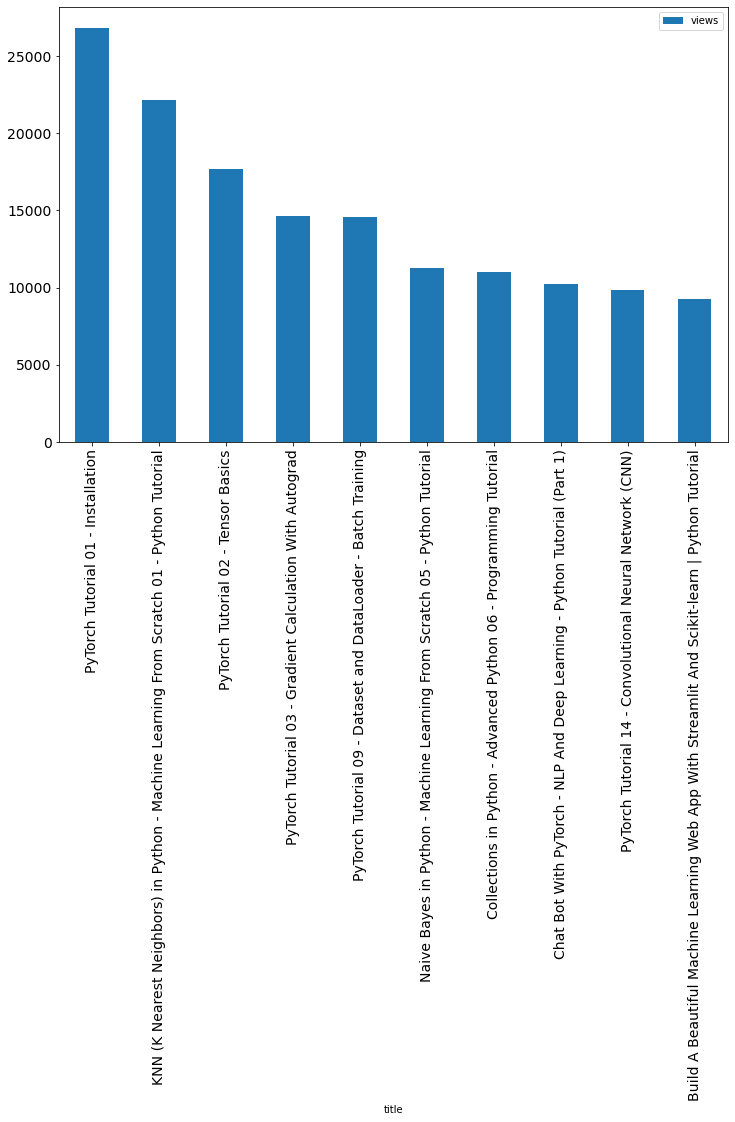

In [11]:
top10 = df.head(10)
ax = top10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)

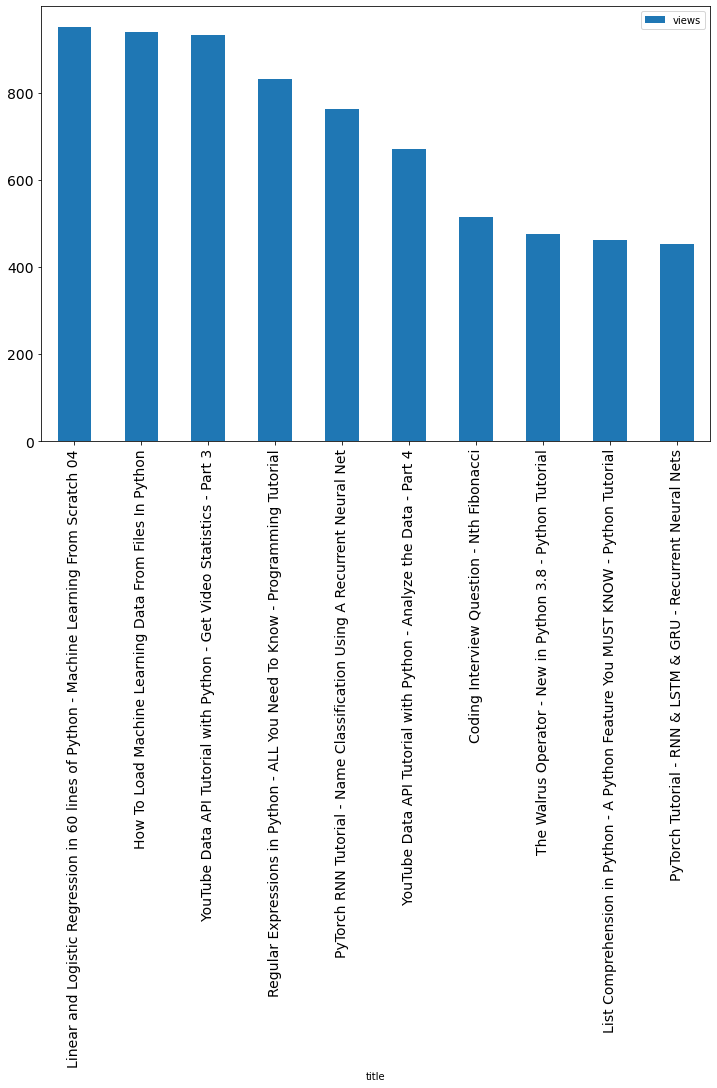

In [12]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)

In [14]:
# likes / dislikes
likes_avg = top10['likes'].mean()
dislikes_avg = top10['dislikes'].mean()
comments_avg = top10['comments'].mean()
print('Top 10')
print('average likes', likes_avg)
print('average dislikes', dislikes_avg)
print('average comments', comments_avg)

likes_avg = bottom10['likes'].mean()
dislikes_avg = bottom10['dislikes'].mean()
comments_avg = bottom10['comments'].mean()
print('Bottom 10')
print('average likes', likes_avg)
print('average dislikes', dislikes_avg)
print('average comments', comments_avg)

Top 10
average likes 263.9
average dislikes 5.7
average comments 55.3
Bottom 10
average likes 30.6
average dislikes 0.5
average comments 14.3
